# Gempy models: 
### 1. Horizontal_layers 
### 2. Recumbent_fold
### 3. Anticline 
### 4. Pinchout
### 5. Fault 
### 6. Unconformity

In [12]:
import os
#Run this cell only if you want to run gempy in cuda mode (requires cuda and a dedicated cpu).
#Initial compilation will take a bit longer but the model will run much faster 
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=cuda"

In [13]:
#import gempy
import gempy as gp

## Initialize Sensor and Projector

In [14]:
#save the paths to the calibration files 
from sandbox import _calibration_dir
_calibprojector = _calibration_dir + "my_projector_calibration.json"
_calibsensor = _calibration_dir + "my_sensor_calibration.json"

In [15]:
#Import Sensor
from sandbox.sensor import Sensor
sensor = Sensor(calibsensor=_calibsensor, name="kinect_v2")

sandbox.sensor.sensor_api: INFO | JSON configuration loaded for sensor.
sandbox.sensor.dummy: INFO | DummySensor initialized.


In [16]:
# Import projector
from sandbox.projector import Projector
projector = Projector(calibprojector=_calibprojector)


sandbox.projector.projector: INFO | JSON configuration loaded for projector


Launching server at http://localhost:44571
sandbox.projector.projector: INFO | Projector initialized and server started.
Please position the browser window accordingly and enter fullscreen!


## Initialize marker detection

In [17]:
#Initialize the aruco detection
from sandbox.markers import MarkerDetection
aruco = MarkerDetection(sensor=sensor)

sandbox.markers.aruco: INFO | Using dummy arucos. Create your own aruco positions using .set_aruco_position() function
sandbox.markers.aruco: INFO | using dummy aruco module
sandbox.markers.aruco: INFO | Aruco module loaded
sandbox.markers.markers_plotting: INFO | Aruco detection ready


## Initialize main thread for live update

In [18]:
from sandbox.main_thread import MainThread
main = MainThread(sensor=sensor, projector=projector, aruco=aruco)

sandbox.projector.contourlines: INFO | ContourLinesModule loaded successfully
sandbox.projector.shading: INFO | LightSource set to address RWTH Aachen, Germany at datetime Mon Dec 13 20:40:26 2021
sandbox.projector.cmap: INFO | CmapModule loaded successfully


In [19]:
# Start the thread 
main.run()

sandbox.main_thread: INFO | Thread started or resumed...


In [27]:
main.widget_plot_module()

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Row
            [0] Column
                [0] Column
                    [0] Markdown(str)
                    [1] Checkbox(name='Show colormap', value=True)
                    [2] Select(name='Choose a colormap', options=['gist_earth', ...], value='gist_earth')
                    [3] Column
                        [0] Markdown(str)
                        [1] Checkbox(name='Show relief shading', value=True)
                        [2] Tabs
                            [0] WidgetBox
                                [0] Checkbox(name='Manual configuration')
                                [1] FloatSlider(end=360.0, name='Azimuth', value=294.0463507446663)
                                [2] FloatSlider(end=90.0, name='Altitude', value=-47.24691132560723)
                                [3] FloatInput(name='Vertical Exageration', step=0.01, value=0.25)
                            [1] WidgetBox
                                [0] TextInput(name='Enter address (e.g. City,..., value='RWTH Aachen, Germany')
                                [1] DatePicker(name='Select date (UTC +0)', value=datetime.date(2021, ...)
                                [2] Row(width_policy='min')
                                    [0] IntSlider(end=23, name='Hour', value=20, width_policy='min')
                                    [1] IntSlider(end=59, name='Minute', value=40, width_policy='min')
                                    [2] IntSlider(end=59, name='Second', value=26, width_policy='min')
                                [3] Markdown(str, sizing_mode='scale_width')
                                [4] Markdown(str, sizing_mode='scale_width')
                                [5] Markdown(str, sizing_mode='scale_width')
                                [6] Markdown(str, sizing_mode='scale_width')
                            [2] WidgetBox
                                [0] Checkbox(name='Start day simulation i...)
                [1] Column
                    [0] Markdown(str)
                    [1] Checkbox(name='Active contours', value=True)
                    [2] Checkbox(name='Automatic levels f...)
                    [3] Markdown(str)
                    [4] WidgetBox
                        [0] Checkbox(name='Show major contours', value=True)
                        [1] IntInput(name='Choose a contour step', value=100)
                        [2] Checkbox(name='Show minor contours', value=True)
                        [3] IntInput(name='Choose a minor c..., value=50)
                        [4] Checkbox(name='Show contours label', value=True)
                        [5] IntInput(name='set a contour l..., value=15)
            [1] Column
                [0] Column
                    [0] Markdown(str)
                    [1] Checkbox(name='Aruco Detection', value=True)
                    [2] Column
                        [0] Markdown(str)
                        [1] Row
                            [0] WidgetBox
                                [0] Checkbox(name='Show aruco location', value=True)
                                [1] Checkbox(name='Show aruco id', value=True)
                                [2] Checkbox(name='Show line connecting a...)
                                [3] ColorPicker(name='Color', value='#ff0000')
                            [1] WidgetBox
                                [0] Markdown(str)
                                [1] Row
                                    [0] IntInput(name='id', value=1, width=70)
                                    [1] IntInput(name='x coordinate', value=50, width=70)
                                    [2] IntInput(name='y coordinate', value=50, width=70)
                                [2] Button(button_type='success', name='Add dummy aruco dict')
                                [3] Button(button_type='warning', name='Clear aruco dict')
                [1] Column
                    [0] Markdown(str)
                    [1] RadioBu

## Initialize the gempy module 

In [21]:
from sandbox.modules.gempy import GemPyModule
gpsb= GemPyModule(geo_model = None, 
                  extent = sensor.extent, 
                  box=sensor.physical_dimensions, 
                  load_examples = True,
                  name_example = ['Horizontal_layers', 'Recumbent_fold', 'Anticline', 'Pinchout', 'Fault', 'Unconformity'], )

Active grids: ['regular']
Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                         values
range              2289.104628
$C_o$            124761.904762
drift equations         [3, 3]
Active grids: ['regular']
Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                         values
range              2289.104628
$C_o$            124761.904762
drift equations         [3, 3]
Active grids: ['regular']
Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                         values
range              

## Add the module to the main thread

In [22]:
main.add_module(name='gempy', module=gpsb)

sandbox.main_thread: INFO | module gempy added to modules


In [24]:
#Turn on Hill Shading
gpsb.show_hillshades = True
gpsb.show_lith = True
gpsb.show_boundary = True
gpsb.show_contour = False
gpsb.show_only_faults = False
gpsb.show_fill_contour = False


## Change between models

scale in Model units/ mm (X,Y,Z): [1.0, 1.25, 5.625] 
the shown extent is [0.0, 1000.0, 0.0, 1000.0] 
Active grids: ['regular' 'topography' 'sections'] 
scale in Model units/ mm (X,Y,Z): [1.0, 1.25, 5.625] 
the shown extent is [0.0, 1000.0, 0.0, 1000.0] 
Active grids: ['regular' 'topography' 'sections'] 
scale in Model units/ mm (X,Y,Z): [1.0, 1.25, 5.625] 
the shown extent is [0.0, 1000.0, 0.0, 1000.0] 
Active grids: ['regular' 'topography' 'sections'] 
scale in Model units/ mm (X,Y,Z): [1.0, 1.25, 5.625] 
the shown extent is [0.0, 1000.0, 0.0, 1000.0] 
Active grids: ['regular' 'topography' 'sections'] 
scale in Model units/ mm (X,Y,Z): [1.0, 1.25, 5.625] 
the shown extent is [0.0, 1000.0, 0.0, 1000.0] 
Active grids: ['regular' 'topography' 'sections']

Column
    [0] Markdown(str)
    [1] RadioButtonGroup(button_type='success', name='Model selector', options=['Horizontal_layers', ...], value='Horizontal_layers')
    [2] Matplotlib(Figure, height=500)
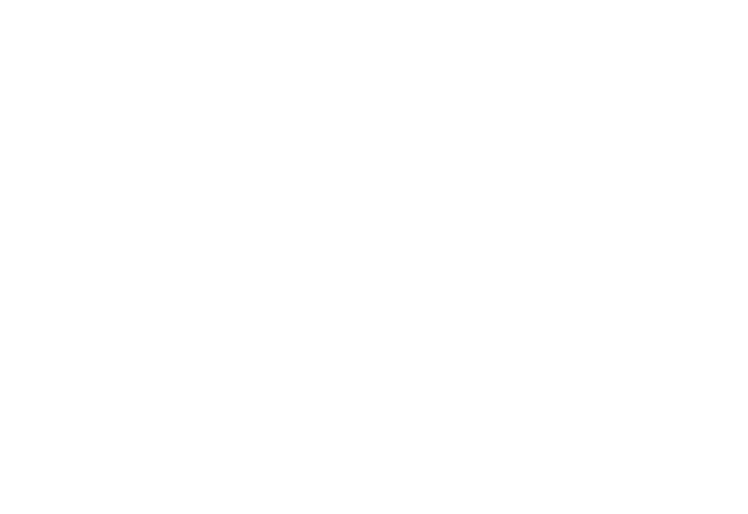

In [25]:
widget = gpsb.widget_model_selector()
widget

In [26]:
#Stop Thread







main.stop()

sandbox.main_thread: INFO | Thread stopped.


In [ ]:
gpsb.plot_3d_model()

In [ ]:
gpsb.borehole_dict

In [ ]:
if len(gpsb.borehole_dict) > 0:
    p = gpsb.plot_boreholes()
    p.show()

In [ ]:
gp.plot_3d(gpsb.geo_model, show_topography=False)

In [ ]:
_ = gpsb.geo_model.set_section_grid({'sect1': ([100., 50.], [800.,900.], [100., 150])})
_ = gp.compute_model(gpsb.geo_model, compute_mesh=False)
gp.plot_2d(gpsb.geo_model, section_names=['topography', 'sect1' ])

In [ ]:
{'sect1': [[100., 50.], [800.,900.], 100.]}

In [ ]:
gpsb.set_section_dict((100,100), (300,300), "1", )

In [ ]:
gpsb.section_dict